In [1]:
import sympy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Number of points per coordinate

In [2]:
n_points_y = 32
n_points_x = 23

# Construct the necessary matrices

In [3]:
x, y = sympy.symbols("x y")
f = sympy.Float(2)
f_numeric = sympy.lambdify([x, y], f)

In [4]:
split_y = np.linspace(-np.pi / 2, np.pi / 2, n_points_y)
split_x = np.linspace(-np.pi / 2, np.pi / 2, n_points_x)
grid_x, grid_y = np.meshgrid(split_y, split_x, indexing="ij")

In [5]:
h_1 = split_x[1] - split_x[0]
h_2 = split_y[1] - split_y[0]

In [6]:
weights = np.array([
[1/36, 1/9, 1/36],
[1/9, 4/9, 1/9],
[1/36, 1/9, 1/36]
])

In [7]:
b = np.zeros(n_points_x*n_points_y)
matrix = np.zeros((n_points_x*n_points_y, n_points_x*n_points_y), dtype=np.float32)

for i in range(n_points_x*n_points_y):
    idx = np.unravel_index(i, (n_points_y, n_points_x))

    # Dirichlet boundary conditions
    if idx[0] == 0:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    if idx[0] == n_points_y - 1:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    if idx[1] == 0:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    if idx[1] == n_points_x - 1:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue

    matrix[i, i - n_points_x - 1] = -h_1 / (6 * h_2) - h_2 / (6 * h_1)
    matrix[i, i - n_points_x] = -2 * h_1 / (3 * h_2) + h_2 / (3 * h_1)
    matrix[i, i - n_points_x + 1] = -h_1 / (6 * h_2) - h_2 / (6 * h_1)

    matrix[i, i - 1] = h_1 / (3 * h_2) - 2 * h_2 / (3 * h_1)
    matrix[i, i - 0] = 4 * h_1 / (3 * h_2) + 4 * h_2 / (3 * h_1)
    matrix[i, i + 1] = h_1 / (3 * h_2) - 2 * h_2 / (3 * h_1)

    matrix[i, i + n_points_x - 1] = -h_1 / (6 * h_2) - h_2 / (6 * h_1)
    matrix[i, i + n_points_x] = -2 * h_1 / (3 * h_2) + h_2 / (3 * h_1)
    matrix[i, i + n_points_x + 1] = -h_1 / (6 * h_2) - h_2 / (6 * h_1)

    slice_0 = slice(idx[0]-1,idx[0]+2)
    slice_1 = slice(idx[1]-1,idx[1]+2)
    
    b[i] = -1 * (f_numeric(grid_x[slice_0, slice_1], grid_y[slice_0, slice_1]) * weights).sum()*h_1*h_2

# Solve the system of linear equations

In [8]:
u = np.linalg.solve(matrix, b)
u = u.reshape(n_points_y, n_points_x)

In [9]:
t = np.linspace(split_x[0], split_x[-1], 200)
(
    xx,
    yy,
) = np.meshgrid(t, t, indexing="ij")

# Visualisation

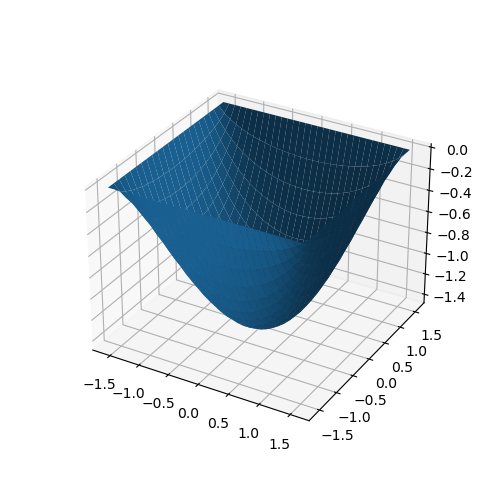

In [10]:
%matplotlib widget
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.plot_surface(grid_x, grid_y, u)
plt.show()

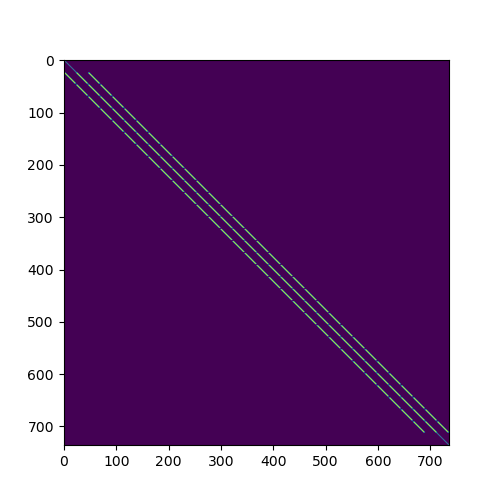

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(matrix != 0)
plt.show()